In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#api key 
api_key ="3ac41afb71d9b2c731188573ce207466"

In [27]:
#empty list for lat and long
lat_lngs = []
cities = []




In [6]:

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



In [8]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [12]:
url="https://api.openweathermap.org/data/2.5/weather?"
print (" Beginning Data Retrieval ")
print (" -------------------------")
totalnumber=len(cities)
#define empty list
City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]


for n in cities:
    recordnumber=cities.index(n)
    query_url = url + "q=" + n  + "&appid="+ api_key
    weather_response = requests.get(query_url).json()
    if weather_response['cod']==200:
        #append the list 
        print(f'Processing Record {recordnumber} of {totalnumber} | {n}')
        City.append(weather_response['name'])
        Cloudiness.append(weather_response['clouds']['all'])
        Country.append(weather_response['sys']['country'])
        Date.append(weather_response['dt'])
        Humidity.append(weather_response['main']['humidity'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Wind_Speed.append(weather_response['wind']['speed'])
    elif weather_response['cod']==404:
        print("City not found. Skipping...")
print (" -------------------------")
print ('Data Retrieval Complete')
print (" -------------------------")

 Beginning Data Retrieval 
 -------------------------
Processing Record 0 of 606 | cayenne
Processing Record 1 of 606 | saldanha
Processing Record 2 of 606 | saint george
Processing Record 4 of 606 | bambous virieux
Processing Record 5 of 606 | ushuaia
Processing Record 6 of 606 | jamestown
Processing Record 7 of 606 | hami
Processing Record 8 of 606 | liberal
Processing Record 9 of 606 | airai
Processing Record 10 of 606 | atuona
Processing Record 11 of 606 | rosarito
Processing Record 12 of 606 | georgetown
Processing Record 13 of 606 | vestmannaeyjar
Processing Record 14 of 606 | carnarvon
Processing Record 15 of 606 | torbay
Processing Record 16 of 606 | la ronge
Processing Record 17 of 606 | altay
Processing Record 18 of 606 | dharchula
Processing Record 19 of 606 | hermanus
Processing Record 20 of 606 | mataura
Processing Record 21 of 606 | san vicente
Processing Record 22 of 606 | guerrero negro
Processing Record 23 of 606 | chulman
Processing Record 24 of 606 | kruisfontein
Pro

Processing Record 233 of 606 | porto novo
Processing Record 234 of 606 | malaya serdoba
Processing Record 235 of 606 | kushiro
Processing Record 236 of 606 | chapleau
Processing Record 237 of 606 | salalah
Processing Record 238 of 606 | boca do acre
Processing Record 239 of 606 | constitucion
Processing Record 240 of 606 | kosai
Processing Record 241 of 606 | srednekolymsk
Processing Record 242 of 606 | buraydah
Processing Record 243 of 606 | eidfjord
Processing Record 244 of 606 | general artigas
Processing Record 245 of 606 | petropavlovsk-kamchatskiy
Processing Record 246 of 606 | adrar
Processing Record 247 of 606 | kendari
Processing Record 248 of 606 | parabel
Processing Record 249 of 606 | port hueneme
Processing Record 250 of 606 | new norfolk
Processing Record 251 of 606 | zyryanka
Processing Record 253 of 606 | yankton
Processing Record 254 of 606 | chihuahua
Processing Record 255 of 606 | potosi
Processing Record 256 of 606 | iqaluit
Processing Record 257 of 606 | prince rup

Processing Record 466 of 606 | quedlinburg
Processing Record 467 of 606 | salmo
Processing Record 469 of 606 | beringovskiy
Processing Record 470 of 606 | cabedelo
Processing Record 472 of 606 | nizhniy kuranakh
Processing Record 473 of 606 | umred
Processing Record 474 of 606 | kirakira
Processing Record 475 of 606 | hearst
Processing Record 476 of 606 | warri
Processing Record 477 of 606 | paungde
Processing Record 478 of 606 | narasimharajapura
Processing Record 479 of 606 | brindisi
Processing Record 480 of 606 | motygino
Processing Record 481 of 606 | axim
Processing Record 482 of 606 | egvekinot
Processing Record 484 of 606 | hovd
Processing Record 485 of 606 | forrest city
Processing Record 486 of 606 | mao
Processing Record 487 of 606 | biak
Processing Record 488 of 606 | pittsburg
Processing Record 489 of 606 | galesong
Processing Record 491 of 606 | concarneau
Processing Record 492 of 606 | saint-joseph
Processing Record 493 of 606 | touros
Processing Record 495 of 606 | jaca

In [28]:
dic={"City":City,'Cloudiness':Cloudiness,"Country":Country,'Date':Date,"Humidity":Humidity,"Lat":Lat,"Lng":Lng,"Max Temp":Max_Temp,"Wind Speed":Wind_Speed}
df=pd.DataFrame(dic)
# exporting to (CSV)
df.to_csv('cities_weather_report')
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cayenne,75,GF,1562810777,94,4.94,-52.33,297.150,1.4
1,Saldanha,0,PT,1562810778,60,41.42,-6.55,293.269,1.1
2,Saint George,75,GR,1562810778,93,39.45,22.34,293.150,4.1
3,Bambous Virieux,20,MU,1562810956,88,-20.34,57.76,293.150,0.5
4,Ushuaia,40,AR,1562810779,96,-54.81,-68.31,276.150,2.6


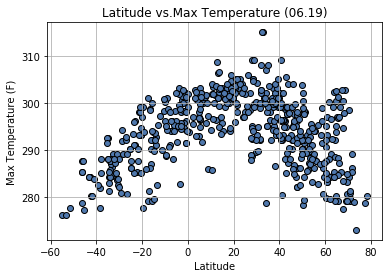

In [24]:
fig, ax = plt.subplots()
LatvsTemp = plt.scatter(df['Lat'],df['Max Temp'] ,marker='o', 
                        c='#4F78AD',edgecolors='black')
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("Latitude vs.Max Temperature (06.19)")
ax=plt.grid()
plt.show()
fig.savefig("LatitudevsMaxTemperature")


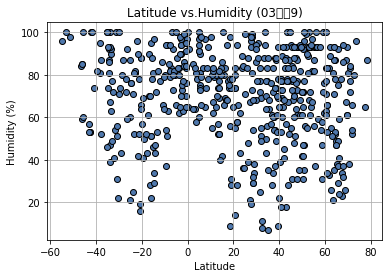

In [20]:
fig, ax = plt.subplots()
LatvsTemp = plt.scatter(df['Lat'],df['Humidity'] ,marker='o', 
                        c='#4F78AD',edgecolors='black')
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("Latitude vs.Humidity (06.19)")
ax=plt.grid()
plt.show()
fig.savefig("LatitudevsHumidity")


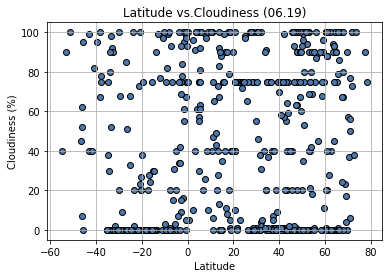

In [29]:
fig, ax = plt.subplots()
LatvsTemp = plt.scatter(df['Lat'],df['Cloudiness'] ,marker='o', 
                        c='#4F78AD',edgecolors='black')
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("Latitude vs.Cloudiness (06.19)")
ax=plt.grid()
plt.show()
fig.savefig("LatitudevsCloudiness")

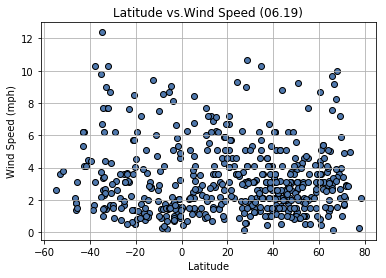

In [26]:
fig, ax = plt.subplots()
LatvsTemp = plt.scatter(df['Lat'],df['Wind Speed'] ,marker='o', 
                        c='#4F78AD',edgecolors='black')
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("Latitude vs.Wind Speed (06.19)")
ax=plt.grid()
plt.show()
fig.savefig("LatitudevsWind Speed")